# HW02: Practice with logistic regression and decision tree

Anais Corona Perez (NetId: coronaperez)

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.tree import export_text

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

Coefficient of model: 8.955644637590678
Intercept of model: -43.55550129285868
Accuracy of model: 93.0%
P(Species = virginica | Petal.length = 5) = 77.25%
Predicted species for Petal.Length 5 is 1 = virginica


Text(0.5, 0, 'x')

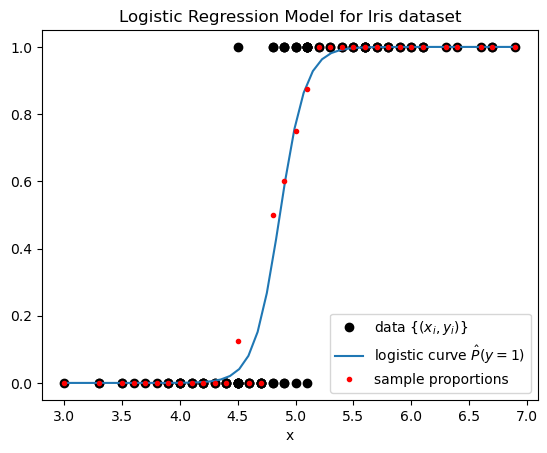

In [2]:
# Create dataframes
iris = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/iris.csv')
iris_noSetosa = iris[iris.Species != 'setosa'][['Petal.Length', 'Species']]
X = iris_noSetosa[['Petal.Length']].values
y = (iris_noSetosa['Species'] == 'virginica').to_numpy().astype(int) # 1 if it is virginica species; 0 if not

#Create logistic regression model and train
model = linear_model.LogisticRegression(C = 1000).fit(X, y)

#Report findings
print(f'Coefficient of model: {model.coef_[0][0]}')
print(f'Intercept of model: {model.intercept_[0]}')
print(f'Accuracy of model: {100*model.score(X, y):.4}%')
print(f'P(Species = virginica | Petal.length = 5) = {100*model.predict_proba([[5]])[:, 1][0]:.4}%')
print(f'Predicted species for Petal.Length 5 is {model.predict([[5]])[0]} = virginica')

#Plot
#Plot datapoints
plt.plot(X, y, 'o', color = 'black', label = r'data $\{(x_i, y_i)\}$')

#Plot curve
xcurve = np.linspace(start = min(X)[0], stop = max(X)[0])
ycurve = 1/(1 + np.exp(-(model.coef_[0] * xcurve + model.intercept_[0])))
plt.plot(xcurve, ycurve, label = r'logistic curve $\hat{P}(y = 1)$')

#find sample proportions
x_val, x_count = np.unique(X, return_counts = True) #Count the number of times each value appears
n_x_val = x_val.shape[0]
success_proportion_per_x_val = np.zeros(n_x_val)
for i in np.arange(n_x_val):
    success_proportion_per_x_val[i] = np.sum(y[X[:, 0] == x_val[i]])/x_count[i]
probs = model.predict_proba(X)[:,1]

#plot sample proportions
plt.plot(x_val, success_proportion_per_x_val, '.', color = 'red', label = 'sample proportions')

plt.legend()
plt.title('Logistic Regression Model for Iris dataset')
plt.xlabel('x')

In [3]:
iris_noSetosa


,Petal.Length,Species
50,4.7,versicolor
51,4.5,versicolor
52,4.9,versicolor
53,4.0,versicolor
54,4.6,versicolor
...,...,...
145,5.2,virginica
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica


## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
    \text{We are given p, use this to find 1-p:}\\
    p & = \frac{1}{e^{-(\mathbf{w x} + b)} + 1}  \hspace{1cm}
    1 - p = 1 - \frac{1}{e^{-(\mathbf{w x} + b)} + 1} = \frac{e^{-(\mathbf{w x} + b)}} {e^{-(\mathbf{w x} + b)} + 1}\\
    \\
    \text{Using both of these values, form the ln expression:}\\
    \frac{p}{1-p}& = \frac{1}{e^{-(\mathbf{w x} + b)} + 1}*\frac{e^{-(\mathbf{w x} + b)} + 1}{e^{-(\mathbf{w x} + b)}}\\
    \\
    & = \frac{1}{e^{-(\mathbf{w x} + b)}}\\
    \\
    \ln \frac{p}{1-p} & = \ln \frac{1}{e^{-(\mathbf{w x} + b)}} \\
    \\
    & = \ln 1 + \ln e (\mathbf{w x} + b) \\
    \\
    & = \mathbf{w x} + b\\
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

1:D, 2:C, 3: A, 4:B

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

Data Frame shape before dropping NA rows: (891, 4)
Data Frame shape after dropping NA rows: (714, 4)

First 7 Rows of Titanic Dataframe:
   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
6         0       1    male  54.0
7         0       3    male   2.0

Accuracy of Decision Tree without depth limit: 89.6%
Max depth of Decision Tree: 15

Accuracy of Decision Tree with depth limit: 79.1%


[Text(0.5, 0.8333333333333334, 'Female <= 0.5\nentropy = 0.974\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'Pclass <= 1.5\nentropy = 0.732\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.969\nsamples = 101\nvalue = [61, 40]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.611\nsamples = 352\nvalue = [299, 53]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\nentropy = 0.804\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.314\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.996\nsamples = 102\nvalue = [55, 47]')]

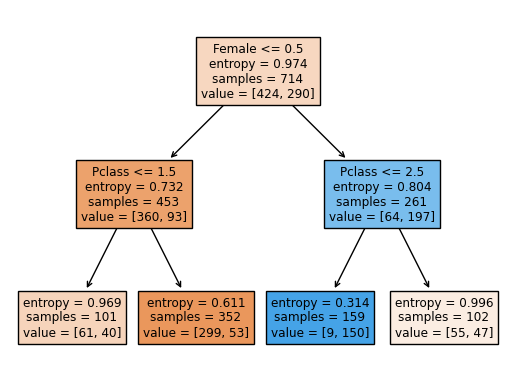

In [4]:
#Create dataframe
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv')
titanic = df[['Survived', 'Pclass', 'Sex', 'Age']]

#Print output and drop NA values
print(f'Data Frame shape before dropping NA rows: {np.shape(titanic)}')
titanic = titanic.dropna()
print(f'Data Frame shape after dropping NA rows: {np.shape(titanic)}\n')
print(f'First 7 Rows of Titanic Dataframe:\n{titanic.head(7)}')

#add column indicating whether a passenger is female
titanic['Female'] = (titanic.Sex == 'female')

#Train 1st Decision Tree
X = titanic[['Pclass', 'Female', 'Age']]
y = titanic.Survived
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state = 0)
clf.fit(X, y)
print(f'\nAccuracy of Decision Tree without depth limit: {100*clf.score(X, y):.3}%')
print(f'Max depth of Decision Tree: {clf.tree_.max_depth}\n')

#Train 2nd Decision Tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
clf.fit(X, y)
print(f'Accuracy of Decision Tree with depth limit: {100*clf.score(X, y):.3}%')
tree.plot_tree(clf, feature_names = ['Pclass', 'Female', 'Age'], filled = True)



## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

Pclass, Female were used in the max_depth = 2 decision-making.

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [5]:
#Separate male and female data
female_data = titanic[titanic.Female == 1]
male_data = titanic[titanic.Female == 0]

#Obtain averages
female_avg = np.mean(female_data.Survived)
male_avg = np.mean(male_data.Survived)

#Print
print(f'The proportion of females that survived is {female_avg:.3}') 
print(f'The proportion of males that survived is {male_avg:.3}')


The proportion of females that survived is 0.755
The proportion of males that survived is 0.205


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

Given:

$
y = \{1, 0, 0, 1\}\hspace{1cm} 
\mathbf{x} = \{(4, 9), (2, 6), (5, 7), (3, 8)\} \hspace{1cm}
S = {(\mathbf{x}, y)}
$

Get $f_{ID3}$ and $H(X)$:

$
f_{ID3}(S)= \displaystyle\frac{1}{|S|}\displaystyle\sum_{(\mathbf{x},y)\in S}y \\
H(S) = -f_{ID3}(S)\log_2f_{ID3}(S)-[1-f_{ID3}(S)]\log_2[1-f_{ID3}(S)]
$


First, we get $f_{ID3}(S)$:

$
f_{ID3}(S) = \displaystyle\frac{1}{4}\displaystyle\sum_{(\mathbf{x},y)\in S}y
        = \displaystyle\frac{1}{4}*2
        = \displaystyle\frac{1}{2}
$

Then, we get $H(S)$:

$
H(S) = -\frac{1}{2}\log_2\frac{1}{2}-[1-\frac{1}{2}]\log_2[1-\frac{1}
{2}]
     = -\frac{1}{2}*(-1)-\frac{1}{2}*(-1)
     = 1
$

The entropy of $S$ is 1

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

First, lets try creating two subsets $S_-$ and $S_+$

Sorting by $x_1$, we get the order:

((2, 6), 0)

((3, 8), 1)

((4, 9), 1)

((5, 7), 0)

Which gives us possible splits at $x_1 = 2.5$:

$f_{ID3}(S_-) = 0 \hspace{1cm} f_{ID3}(S_+) = \frac{2}{3}$

$H(S_-, S_+) = \frac{3}{4}[-\frac{2}{3}\log_2\frac{2}{3}-\frac{1}{3}\log_2\frac{1}{3}] \approx 0.689$

at $x_1 = 3.5$:

$f_{ID3}(S_-) = \frac{1}{2} \hspace{1cm} f_{ID3}(S_+) = \frac{1}{2}$

$H(S_-, S_+) = \frac{1}{2}[-\log_2\frac{1}{2}-\log_2\frac{1}{2}] = 1$

and $x_1 = 4.5$:

$f_{ID3}(S_-) = \frac{2}{3} \hspace{1cm} f_{ID3}(S_+) = 0$

$H(S_-, S_+) = \frac{3}{4}[-\frac{2}{3}\log_2\frac{2}{3}-\frac{1}{3}\log_2\frac{1}{3}] \approx 0.689$

Sorting by $x_2$, we get:

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

((4, 9), 1)

This allows us to create a split at $x_2 = 6.5$ 

$f_{ID3}(S_-) = 0 \hspace{1cm} f_{ID3}(S_+) = \frac{2}{3}$

$H(S_-, S_+) = \frac{3}{4}[-\frac{2}{3}\log_2\frac{2}{3} - \frac{1}{3}\log_2\frac{1}{3}] = \frac{1}{2} \approx 0.689$

at $x_2 = 7.5$ 

$f_{ID3}(S_-) = 0 \hspace{1cm} f_{ID3}(S_+) = 1$

$H(S_-, S_+) = \frac{2}{4}[\log_21 - \log_21] = 0$

and at $x_2 = 8.5$ 

$f_{ID3}(S_-) = \frac{1}{3} \hspace{1cm} f_{ID3}(S_+) = 1$

$H(S_-, S_+) = \frac{3}{4}[-\frac{1}{3}\log_2\frac{1}{3} - \frac{2}{3}\log_2\frac{2}{3}] = \frac{1}{2} \approx 0.689$

We want to minimize the weighted entrophy $H(S_-, S_+)$ of the split (ideally have it at 0), so a split at $x_2 = 7.5$ is the best; where $S_- = \{((2,6), 0),((5,7), 0)\}$ and $S_+ = \{((3,8), 1), ((4, 9), 1)\}$








In [1]:
from sklearn.impute import SimpleImputer
import numpy as np
X = np.array([[3], [np.nan], [2]])
imp = SimpleImputer(missing_values=np.nan, strategy='median', fill_value=None)
X_transformed = imp.fit_transform(X)
print(X_transformed)

[[3. ]
 [2.5]
 [2. ]]
